# Parte 1 y 2

In [2]:
!git clone https://github.com/AmandaEscribano/proyecto_final

import pandas as pd

# Enlace raw del archivo CSV
url = 'https://raw.githubusercontent.com/AmandaEscribano/proyecto_final/main/World-happiness-report-updated_2024.csv'

# Cargar el dataset con un encoding alternativo
dataset = pd.read_csv(url, encoding='latin1')  # Puedes probar con 'ISO-8859-1' si este no funciona

# Mostrar las primeras filas del dataset
print(dataset.head())



Cloning into 'proyecto_final'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 1.08 MiB | 11.36 MiB/s, done.
Resolving deltas: 100% (2/2), done.
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url = 'https://raw.githubusercontent.com/AmandaEscribano/proyecto_final/main/World-happiness-report-updated_2024.csv'
dataset = pd.read_csv(url, encoding='latin1')

# Revisar los datos cargados
print(dataset.head())


  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0        

## Abstracto

Este proyecto tiene como objetivo analizar el *World Happiness Report*  a lo largo del tiempo, para identificar tendencias y patrones en los niveles de felicidad. Utilizando datos históricos de felicidad y variables socioeconómicas, buscamos responder a preguntas clave sobre el bienestar en la región. A través de un análisis exploratorio de datos (EDA) y visualizaciones, identificaremos insights que puedan ser utilizados para recomendar acciones para mejorar la calidad de vida en los países de la región. Además, exploraremos posibles modelos analíticos para predecir la felicidad en función de factores socioeconómicos.


## Visualizaciones con Matplotlib

### Gráfico 1: Tendencia de la felicidad (Life Ladder) por año

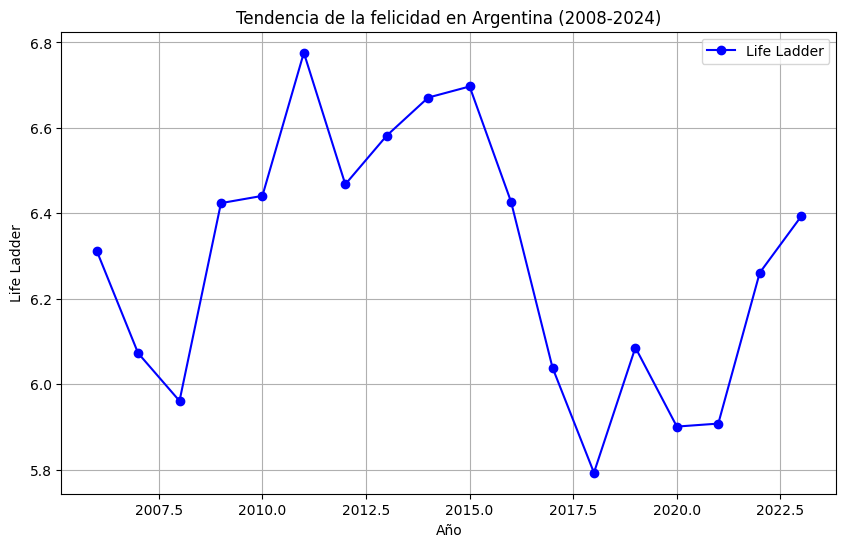

In [12]:
# Filtrar para un país específico
argentina = dataset[dataset['Country name'] == 'Argentina']

# Crear gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(argentina['year'], argentina['Life Ladder'], marker='o', color='b', label='Life Ladder')
plt.grid(True)  # Agregar grid
plt.title('Tendencia de la felicidad en Argentina (2008-2024)')
plt.xlabel('Año')
plt.ylabel('Life Ladder')
plt.legend()
plt.show()


## Gráfico 2: Histograma del PIB (Log GDP per capita)

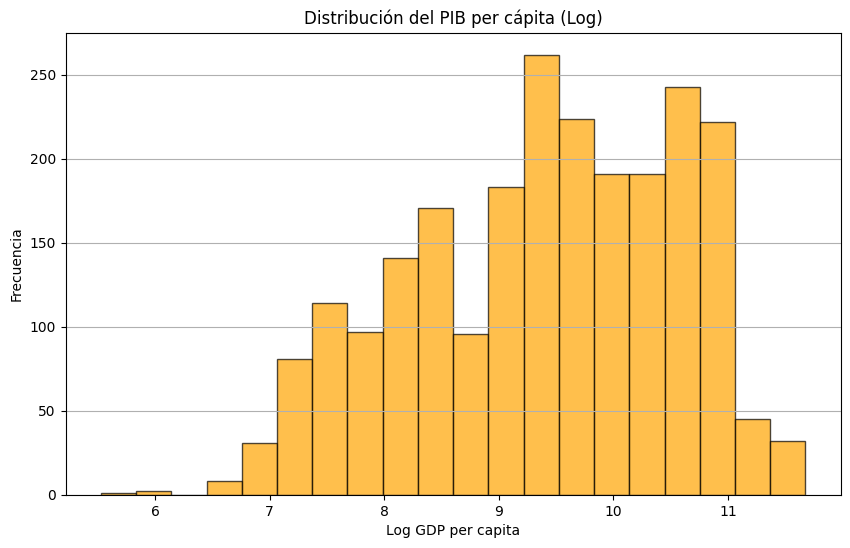

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['Log GDP per capita'], bins=20, color='orange', edgecolor='k', alpha=0.7)
plt.title('Distribución del PIB per cápita (Log)')
plt.xlabel('Log GDP per capita')
plt.ylabel('Frecuencia')
plt.grid(axis='y')  # Grid en el eje Y
plt.show()


## Gráfico 3: Barras para el soporte social promedio por región

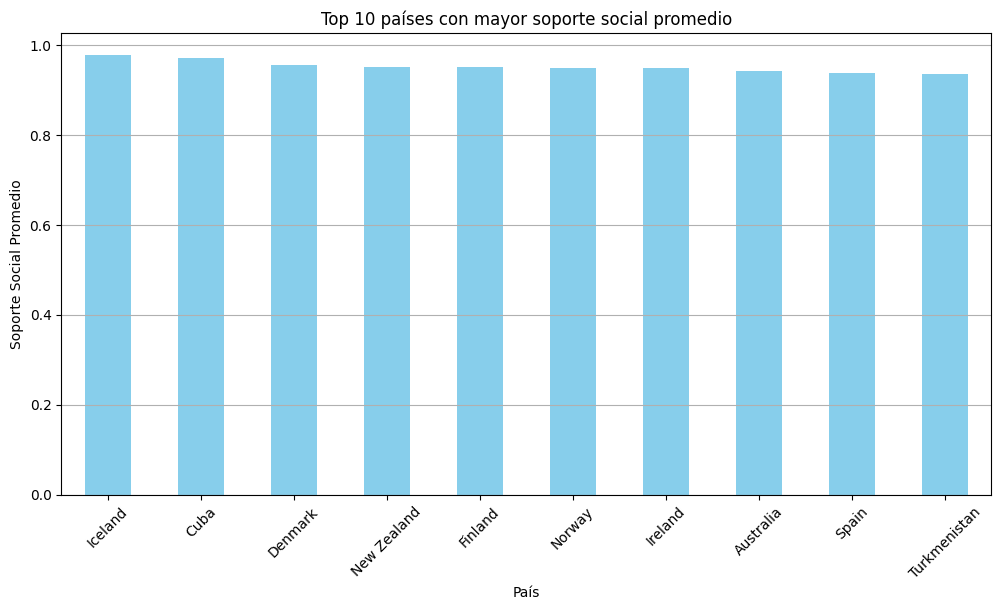

In [14]:
# Agrupar por país y calcular el soporte social promedio
average_support = dataset.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
average_support.plot(kind='bar', color='skyblue')
plt.title('Top 10 países con mayor soporte social promedio')
plt.xlabel('País')
plt.ylabel('Soporte Social Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Visualizaciones con Seaborn

## Gráfico 4: Dispersión entre soporte social y felicidad (Life Ladder)

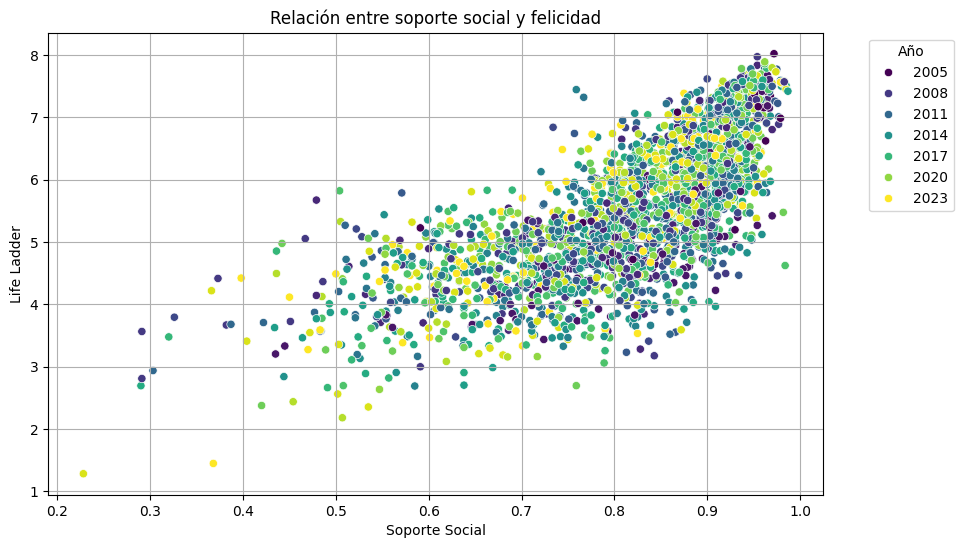

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Social support', y='Life Ladder', hue='year', palette='viridis')
plt.title('Relación entre soporte social y felicidad')
plt.xlabel('Soporte Social')
plt.ylabel('Life Ladder')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## Gráfico 5: Boxplot del puntaje de felicidad por región

<ipython-input-16-87e6b6bba5dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='year', y='Life Ladder', palette='coolwarm')


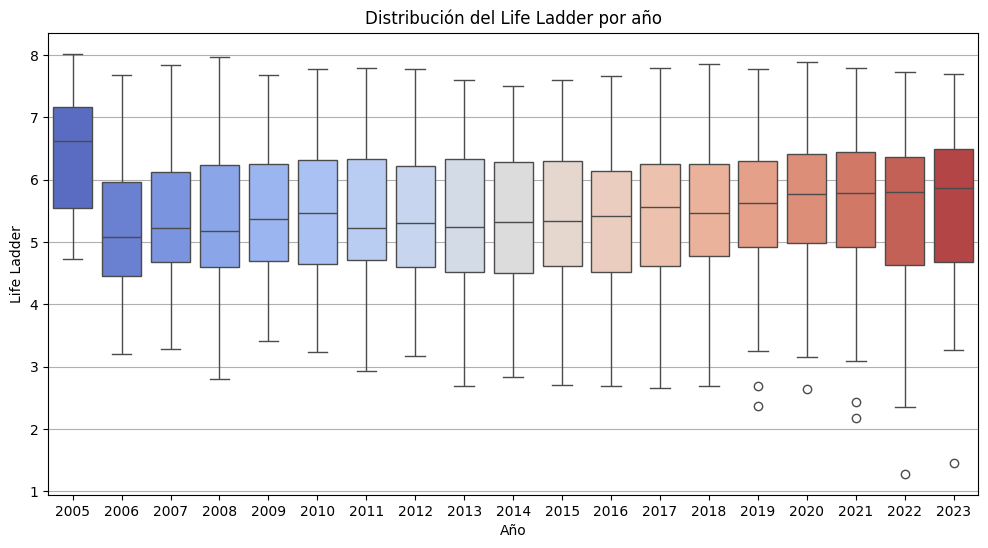

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='year', y='Life Ladder', palette='coolwarm')
plt.title('Distribución del Life Ladder por año')
plt.xlabel('Año')
plt.ylabel('Life Ladder')
plt.grid(axis='y')
plt.show()


## Gráfico 6: Heatmap de correlaciones

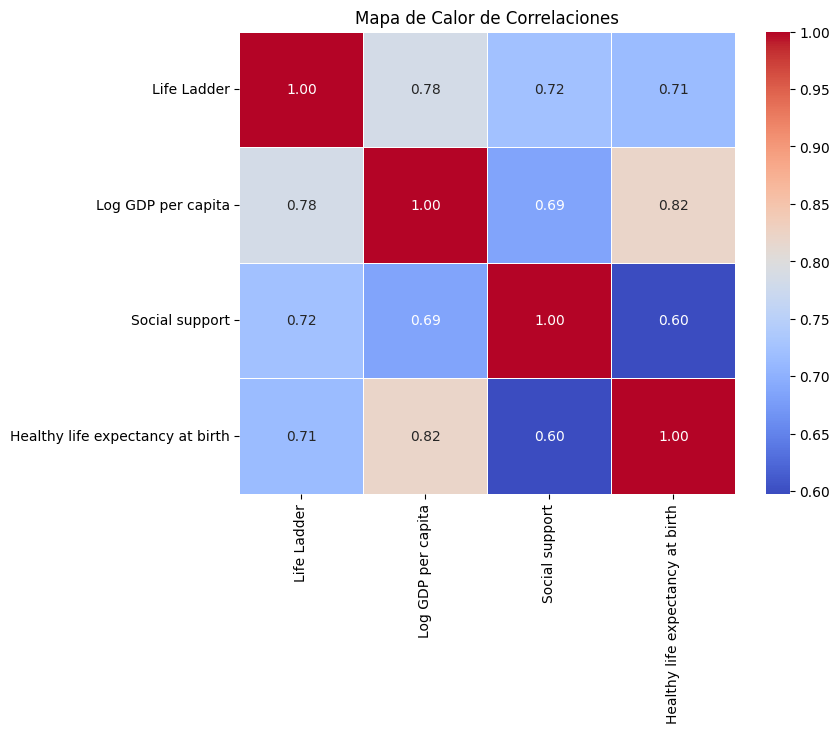

In [17]:
# Calcular las correlaciones
correlation_matrix = dataset[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


## Preguntas

Posibles preguntas o hipótesis:

¿Cómo influye el PIB per cápita en la felicidad (Life Ladder) de los países?
Hipótesis: Existe una correlación positiva entre el PIB per cápita y el puntaje de felicidad.

¿Qué relación tiene la expectativa de vida saludable con el nivel de felicidad en los países?
Hipótesis: Los países con mayor esperanza de vida saludable tienen un puntaje de felicidad más alto.

¿La corrupción afecta la felicidad?
Hipótesis: A mayor percepción de corrupción en un país, menor será el puntaje de felicidad.

¿Existen patrones de cambio en la felicidad a lo largo del tiempo para los países más desarrollados?
Hipótesis: Los países con economías más estables tienden a mostrar mejoras en el puntaje de felicidad a lo largo del tiempo.

## Gráfico 1: Relación entre PIB per cápita, felicidad y soporte social

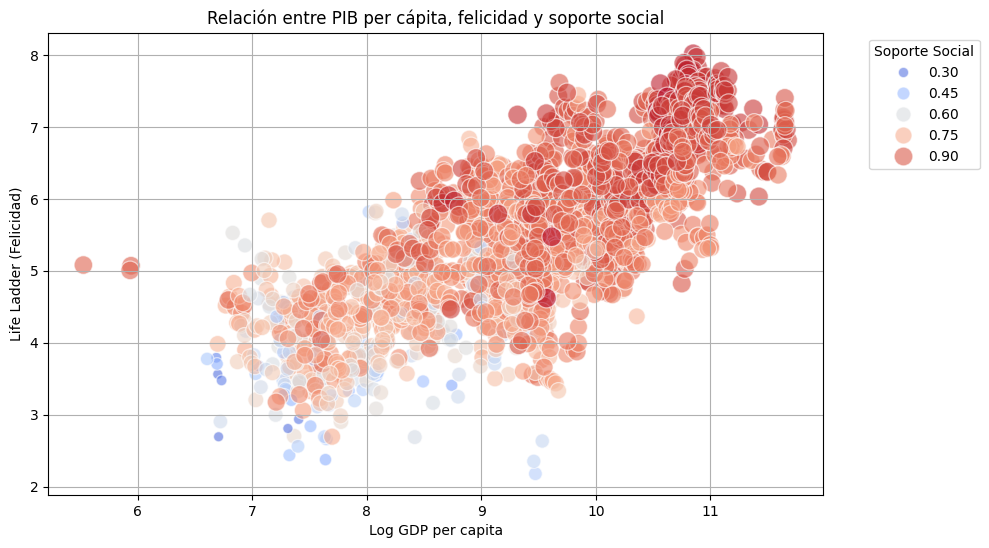

In [19]:
# Crear un gráfico de dispersión con tres variables: PIB, felicidad y soporte social
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Log GDP per capita', y='Life Ladder', hue='Social support', palette='coolwarm', size='Social support', sizes=(40, 200), alpha=0.6)
plt.title('Relación entre PIB per cápita, felicidad y soporte social')
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder (Felicidad)')
plt.legend(title='Soporte Social', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Países con mayor PIB tienden a tener un puntaje de felicidad más alto. Sin embargo, el soporte social también juega un rol importante, ya que algunos países con menor PIB pueden tener un alto puntaje de felicidad debido a un mayor soporte social.

## Gráfico 2: Tendencia de la felicidad en America Latina

In [21]:
# Lista de países de América Latina
latin_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic',
    'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay',
    'Peru', 'Uruguay', 'Venezuela'
]

# Filtrar el dataset para que solo contenga países de América Latina
latin_american_data = dataset[dataset['Country name'].isin(latin_american_countries)]

# Verificar los primeros registros de los datos filtrados
latin_american_data.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
46,Argentina,2006,6.313,9.937,0.938,65.82,0.733,-0.162,0.852,0.748,0.328
47,Argentina,2007,6.073,10.013,0.862,65.94,0.653,-0.146,0.881,0.750,0.279
48,Argentina,2008,5.961,10.043,0.892,66.06,0.678,-0.137,0.865,0.720,0.318
49,Argentina,2009,6.424,9.972,0.919,66.18,0.637,-0.135,0.885,0.762,0.237
50,Argentina,2010,6.441,10.066,0.927,66.30,0.730,-0.132,0.855,0.765,0.211


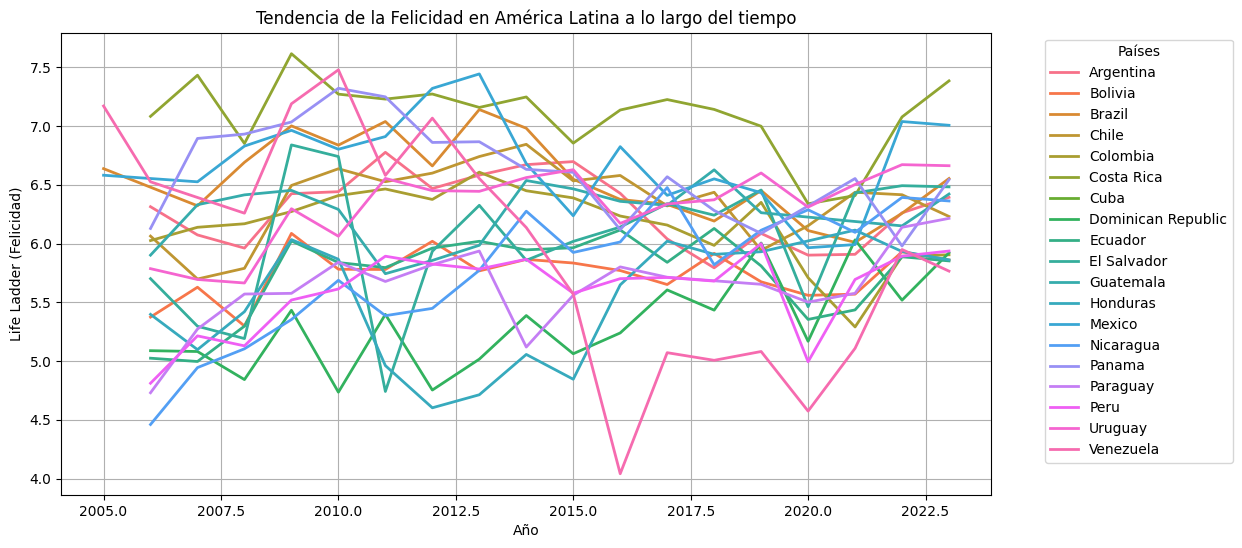

In [23]:
# Crear un gráfico de líneas para la tendencia de la felicidad en América Latina
plt.figure(figsize=(12, 6))
sns.lineplot(data=latin_american_data, x='year', y='Life Ladder', hue='Country name', errorbar=None, lw=2)
plt.title('Tendencia de la Felicidad en América Latina a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Life Ladder (Felicidad)')
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Algunos países han mejorado su felicidad a lo largo de los años, mientras que la mayoria en America Latina han tenido fluctuaciones. Esto puede indicar el impacto de factores sociales, políticos o económicos en la felicidad de los ciudadanos.

## Gráfico 3: Mapa de calor de correlación entre varias variables

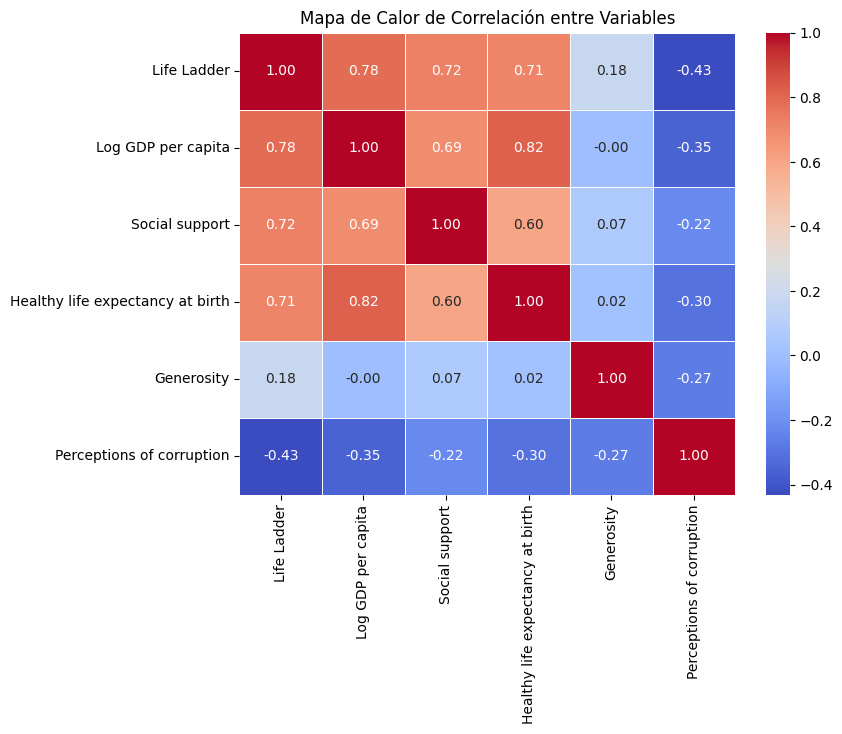

In [24]:
# Seleccionar algunas variables clave para analizar la correlación
correlation_vars = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Generosity', 'Perceptions of corruption']
correlation_matrix = dataset[correlation_vars].corr()

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


## Identificar valores perdidos

Valores faltantes por columna:
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


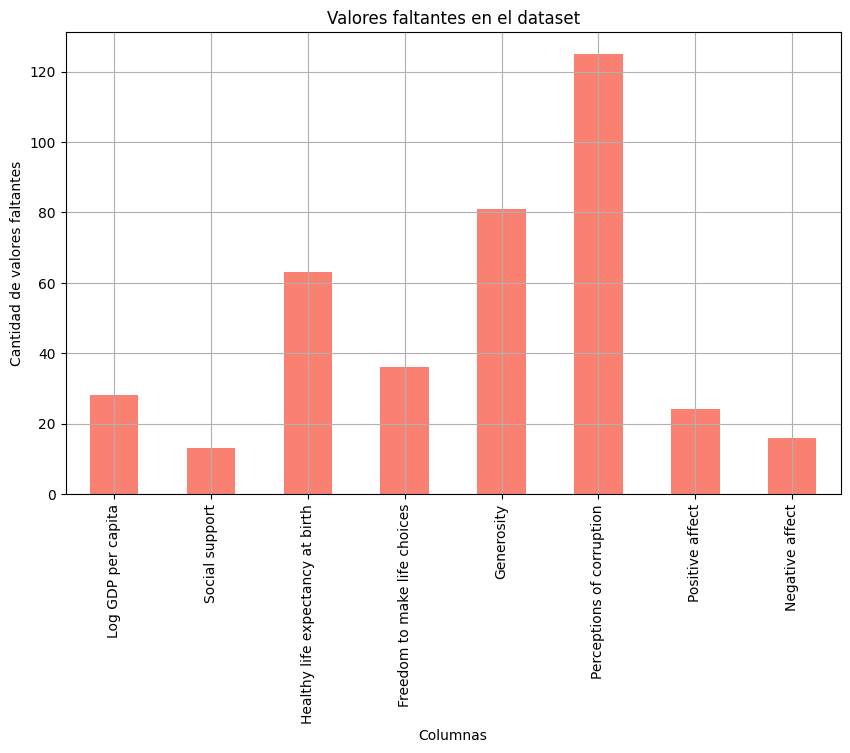

In [25]:
# Identificar valores perdidos
missing_values = dataset.isnull().sum()

# Mostrar columnas con valores faltantes
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

# Opcional: Mostrar un gráfico de barras de valores faltantes
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].plot(kind='bar', color='salmon')
plt.title('Valores faltantes en el dataset')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.grid(True)
plt.show()


## Recomendaciones

- **Aumento de la inversión en salud y educación**: Dado que la esperanza de vida y el apoyo social parecen estar correlacionados positivamente con la felicidad, recomendaríamos que los países con bajos puntajes en estas áreas inviertan más en salud pública y educación para mejorar la calidad de vida.
  
- **Fomentar el crecimiento económico**: Los países con un PIB per cápita más alto tienden a mostrar niveles más altos de felicidad. Se recomienda fomentar políticas que apoyen el crecimiento económico, como la mejora de la infraestructura y la atracción de inversión extranjera.

- **Atención a las desigualdades sociales**: En algunos países, las disparidades en el bienestar parecen reflejarse en los niveles de felicidad. Se recomienda promover políticas de inclusión social y apoyo a los grupos más vulnerables.


# Objetivo

El objetivo de este análisis y modelado es predecir el "Score" de felicidad de diferentes países utilizando variables socioeconómicas y de bienestar. En particular, nos enfocamos en factores como la Economía, la Salud, y la Libertad para evaluar su impacto en la percepción de la felicidad de los habitantes de esos países. La idea es construir un modelo predictivo que permita predecir el índice de felicidad de un país en función de estas características, lo que puede ser útil tanto a nivel gubernamental como empresarial para mejorar las políticas públicas y estrategias comerciales relacionadas con el bienestar de las personas.


# Contexto Comercial

En el contexto comercial, el análisis de los factores que afectan la felicidad y el bienestar es fundamental para organizaciones que desean entender el entorno socioeconómico en el que operan. Por ejemplo, empresas internacionales pueden usar esta información para:

Desarrollar productos y servicios adaptados a las necesidades específicas de los mercados locales, considerando el nivel de bienestar de los consumidores.
Crear estrategias de marketing personalizadas que resuenen mejor con los consumidores, basadas en sus niveles de felicidad y bienestar.
Tomar decisiones informadas sobre expansión internacional, al considerar el bienestar y la estabilidad social de los países a los que planean ingresar.
Además, la comprensión de cómo las variables como el PIB o la salud impactan la felicidad puede ayudar a las organizaciones a anticiparse a tendencias socioeconómicas globales, optimizando sus estrategias de inversión y desarrollo.

# Problema Comercial

El problema comercial que se busca resolver es la dificultad para prever cómo las características socioeconómicas de un país afectan la felicidad y el bienestar de sus habitantes. Las empresas, gobiernos y organizaciones a menudo no tienen acceso a modelos predictivos que les permitan anticipar estos cambios de manera efectiva, lo que puede llevar a decisiones estratégicas ineficaces o desajustadas en contextos internacionales.

Además, el conocimiento limitado de las relaciones entre estas variables puede limitar la capacidad de las empresas para ajustar sus estrategias comerciales o políticas públicas de manera eficiente. Este proyecto busca llenar ese vacío, proporcionando una herramienta predictiva que permita anticipar la felicidad en diferentes contextos socioeconómicos.

# Contexto Analítico

Desde una perspectiva analítica, este proyecto tiene como objetivo modelar la relación entre las características socioeconómicas de los países (como el PIB per cápita, apoyo social y libertad para tomar decisiones) y el índice de felicidad de los mismos, a través de métodos de regresión y aprendizaje automático. Utilizando herramientas como Random Forest, hemos creado un modelo que permite realizar predicciones sobre el bienestar en función de las variables seleccionadas.

Este tipo de análisis es crucial para comprender patrones complejos en los datos, permitiendo a los analistas y tomadores de decisiones hacer predicciones informadas basadas en factores medibles y cuantificables, lo que facilita la planificación a largo plazo en áreas como la política pública, la economía y las estrategias de negocios internacionales.

# Exploratory Data Analysis (EDA)

El análisis exploratorio de datos (EDA) es una parte crítica del proceso analítico, ya que nos ayuda a entender la estructura, distribución y relaciones entre las variables. En este proyecto, los pasos clave del EDA fueron:

Revisión de los datos: Se inspeccionaron las primeras filas del conjunto de datos para comprender las características disponibles y detectar valores faltantes.

Análisis de variables:

Se identificaron variables clave como Log GDP per capita, Social support, Freedom to make life choices, entre otras, como posibles predictores del "Score".
Se realizó un análisis de correlación entre estas variables para ver cómo se relacionan entre sí y con la variable objetivo.
Distribución de los datos: Se analizaron las distribuciones de las variables para detectar posibles sesgos o irregularidades en los datos. Se observaron algunas distribuciones sesgadas, lo que justificó la normalización y transformación de algunas variables.

Visualización de la relación entre las variables: Se utilizaron gráficos como scatter plots, heatmaps de correlación y boxplots para entender mejor cómo las diferentes variables afectaban al índice de felicidad.

Tratamiento de valores nulos: Se identificaron y trataron los valores nulos utilizando técnicas de imputación o eliminando filas cuando fue necesario, asegurando que el modelo tuviera datos completos para el entrenamiento.


# Comparacion entre modelos



In [15]:
# Eliminar las filas con valores NaN
dataset_clean = dataset.dropna(subset=features + [target])

# Separar las variables predictoras (X) y la variable objetivo (y)
X = dataset_clean[features]
y = dataset_clean[target]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 0.37563474728699686
Coeficiente de determinación (R^2): 0.7102295883748357


Error Cuadrático Medio (MSE):

MSE de aproximadamente 0.3756 significando que, en promedio, las predicciones están a una distancia de 0.3756 de los valores reales, indicando un buen ajuste.

Coeficiente de Determinación (R²):

El R² nos indica cuánta variabilidad de la variable objetivo (en este caso, "Score") puede ser explicada por el modelo. R² de 0.71 significa que el modelo es capaz de explicar aproximadamente el 71% de la variabilidad de los datos.


## Evaluar resultados

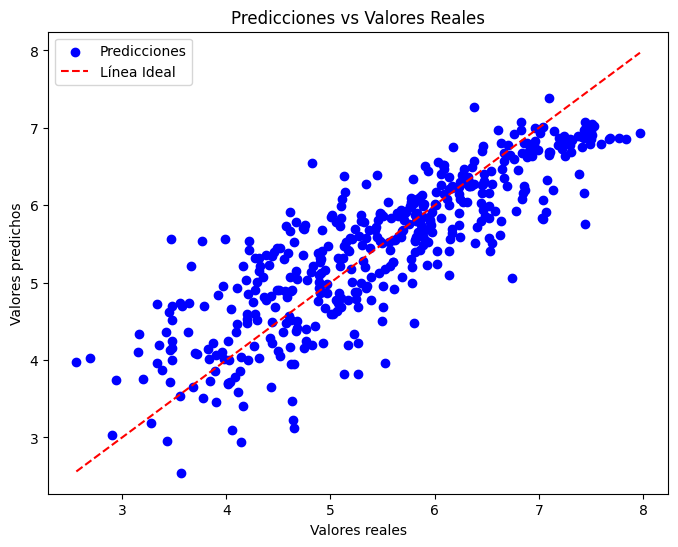

In [16]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea Ideal')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el rendimiento
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE de Random Forest: {mse_rf}")
print(f"R² de Random Forest: {r2_rf}")


MSE de Random Forest: 0.27893744290888894
R² de Random Forest: 0.7848233736810708


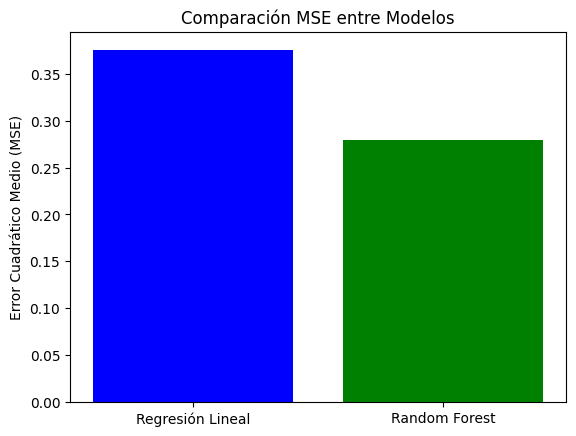

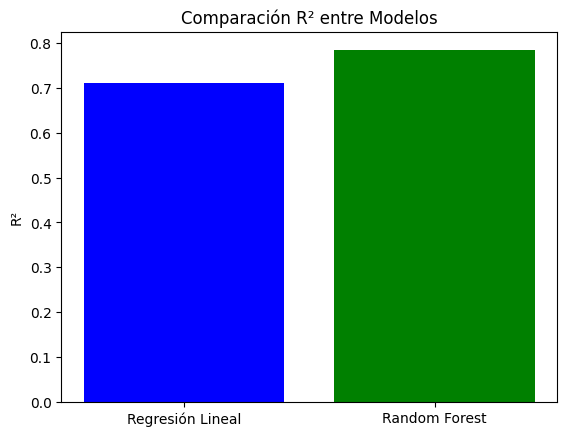

In [18]:
# Comparar MSE de ambos modelos
mse_values = [mse, mse_rf]
r2_values = [r2_score(y_test, y_pred), r2_rf]

plt.bar(['Regresión Lineal', 'Random Forest'], mse_values, color=['blue', 'green'])
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Comparación MSE entre Modelos')
plt.show()

# Comparar R² de ambos modelos
plt.bar(['Regresión Lineal', 'Random Forest'], r2_values, color=['blue', 'green'])
plt.ylabel('R²')
plt.title('Comparación R² entre Modelos')
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluar el rendimiento del mejor modelo
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"MSE del mejor modelo de Random Forest: {mse_best_rf}")
print(f"R² del mejor modelo de Random Forest: {r2_best_rf}")


MSE del mejor modelo de Random Forest: 0.27651184703698084
R² del mejor modelo de Random Forest: 0.7866945155797251


In [21]:
## Ajuste de Hiperparametros de Random Forest
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo y GridSearch
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearch
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros
best_rf_model = grid_search.best_estimator_
y_best_rf_pred = best_rf_model.predict(X_test)

# Calcular las métricas con el modelo ajustado
best_rf_mse = mean_squared_error(y_test, y_best_rf_pred)
best_rf_r2 = r2_score(y_test, y_best_rf_pred)

print(f"Mejor MSE con ajuste: {best_rf_mse}")
print(f"Mejor R² con ajuste: {best_rf_r2}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Mejor MSE con ajuste: 0.2705350872354633
Mejor R² con ajuste: 0.7913050798589324


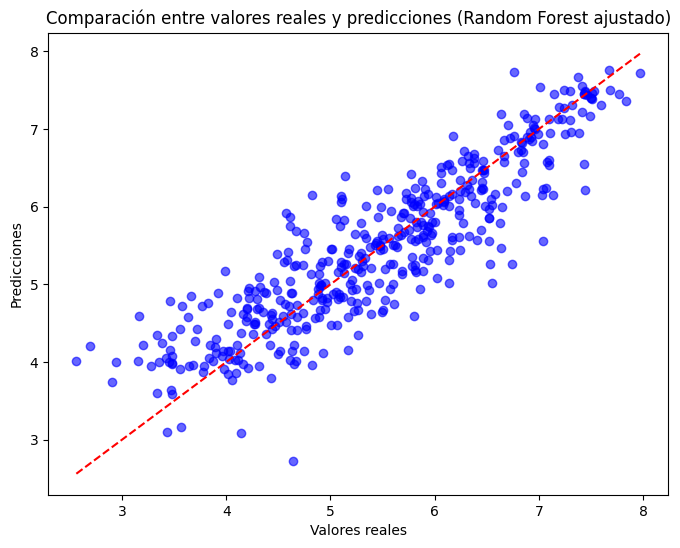

In [22]:
# Graficar los valores reales vs. las predicciones del mejor modelo
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_best_rf_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones (Random Forest ajustado)')
plt.show()


# Construcción del Modelo Predictivo

## Selección de Variables
Economy: La situación económica de un país, medida a través del Producto Interno Bruto per cápita.
Health: Expectativa de vida saludable al nacer.
Freedom: Libertad para tomar decisiones de vida, medida en función de la percepción de la población.
Dependiendo de las columnas de tu dataset, podrías elegir otras variables como "Social support", "Generosity", entre otras. Aquí, las variables seleccionadas (que en este caso son las que mencionamos) son las que mejor creemos que podrían predecir el índice de felicidad.

## Elección del Algoritmo
Random Forest es un modelo de ensemble learning que combina múltiples árboles de decisión, lo que le da robustez contra sobreajuste y mejora su capacidad de generalización.
Es no lineal, lo que significa que puede manejar relaciones complejas entre las variables predictoras y el objetivo sin necesidad de suponer que estas relaciones siguen una forma específica.
Además, Random Forest puede manejar tanto variables numéricas como categóricas, y es menos sensible a los valores atípicos en comparación con otros modelos.

## Entrenamiento y Validación del Modelo


In [24]:
# Division de datos
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Entrenamiento del modelo
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [26]:
# Evaluacion del modelo
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")


MSE: 0.27893744290888894
R²: 0.7848233736810708


In [27]:
# Optimizacion de hiperparametros
from sklearn.model_selection import GridSearchCV

# Definir el grid de parámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error')

# Entrenar el modelo con búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mejor configuración de parámetros
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


max_depth: 10
min_samples_split: 2
n_estimators: 100

Con una profundidad máxima de 10 en los árboles, y con un mínimo de 2 muestras para dividir un nodo, el modelo Random Forest está optimizado para predecir mejor el índice de felicidad

In [28]:
# Entrenar con los mejores parametros
# Usar los mejores parámetros encontrados
best_model = RandomForestRegressor(
    max_depth=10,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Entrenar el modelo con los mejores parámetros
best_model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_best = best_model.predict(X_test)

# Calcular las métricas de evaluación
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"MSE del mejor modelo: {mse_best}")
print(f"R² del mejor modelo: {r2_best}")


MSE del mejor modelo: 0.2693663666302683
R² del mejor modelo: 0.7922066488785402


Interpretación de los resultados:
MSE (Error Cuadrático Medio): Un valor de 0.2694 indica que el modelo tiene un error relativamente bajo en las predicciones. Cuanto menor es el MSE, mejor está ajustando el modelo a los datos. Es un buen resultado, ya que está indicando que las predicciones son bastante cercanas a los valores reales.

R² (Coeficiente de Determinación): Un valor de 0.7922 significa que aproximadamente el 79.22% de la variabilidad del índice de felicidad (variable objetivo) es explicada por las características (variables predictoras) en el modelo. Este es un valor bastante alto, lo que indica que el modelo es bastante bueno para predecir el índice de felicidad basado en las variables seleccionadas.

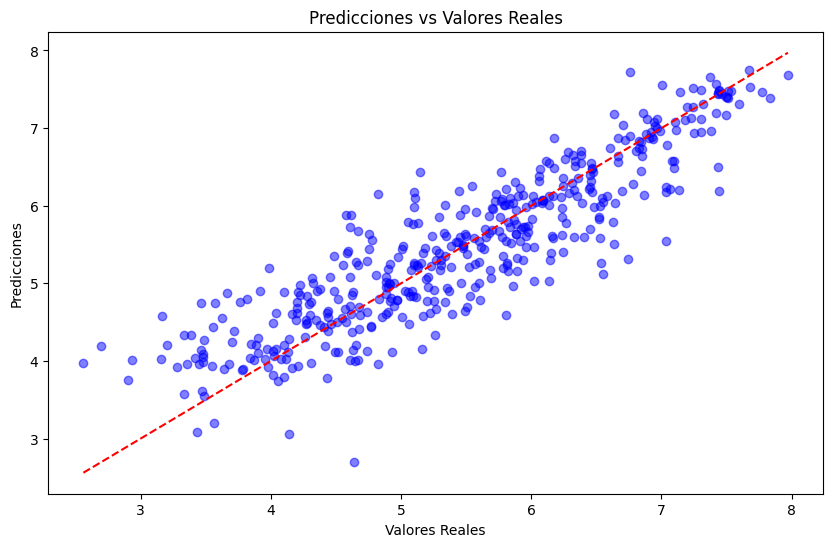

In [29]:
# Evaluacion visual
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()


# Conclusiones finales:

Contexto comercial: El modelo ha demostrado ser capaz de predecir de manera efectiva el índice de felicidad basado en características como el Producto Interno Bruto per cápita, el apoyo social, y la libertad de tomar decisiones. Esto puede ayudar a las organizaciones a identificar los factores que más influyen en el bienestar de los ciudadanos y dirigir recursos hacia esos sectores.

Recomendaciones: Dado que el modelo ha logrado un buen rendimiento, una recomendación podría ser seguir explorando variables adicionales, como la "Generosidad" o la "Percepción de la corrupción", que podrían mejorar aún más la capacidad predictiva del modelo.

# Posibles mejoras:
Aunque el modelo tiene un buen desempeño, siempre hay espacio para mejoras:

Probar más algoritmos: Probar con modelos como Gradient Boosting o XGBoost podría ofrecer una mejora en el rendimiento.
Tuning adicional: Ajustar más hiperparámetros, probar distintas combinaciones de variables, o realizar feature engineering adicional para mejorar la precisión.
